<a href="https://colab.research.google.com/github/ricardorocha86/Python-para-Machine-Learning/blob/master/Redes_Neurais_no_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![texto alternativo](https://github.com/gitflai/imagens/blob/main/capa.jpg?raw=true)

# **Redes Neurais**



## **Importação dos dados**


In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ricardorocha86/Datasets/master/Custos%20M%C3%A9dicos/insurance.csv'
dados = pd.read_csv(url)

dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = (dados['charges'] - dados['charges'].mean())/dados['charges'].std() 
dados['bmi'] = (dados['bmi'] - dados['bmi'].mean())/dados['bmi'].std()  

dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,-0.453151,0,1,southwest,0.298472
1,18,male,0.509431,1,0,southeast,-0.953333
2,28,male,0.383164,3,0,southeast,-0.728402
3,33,male,-1.305043,0,0,northwest,0.719574
4,32,male,-0.292447,0,0,northwest,-0.776512


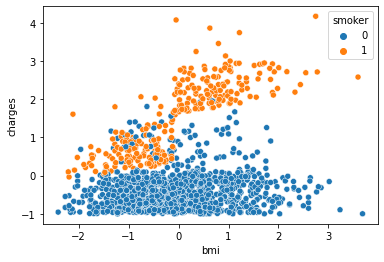

In [3]:
import seaborn as sns

sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados);

X = dados[['bmi', 'charges']]
y = dados['smoker'] 

## **Validação Cruzada**


In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

kf = KFold(n_splits = 5, shuffle = True)


## **Rede Neural**


In [22]:
from sklearn.neural_network import MLPClassifier 

modelo = MLPClassifier(hidden_layer_sizes = (20, 10), 
                       activation = 'relu', 
                       batch_size = 64, 
                       learning_rate = 'constant', 
                       learning_rate_init = 0.01, 
                       max_iter = 200, 
                       early_stopping = True, 
                       n_iter_no_change = 50,)


metricas = cross_validate(modelo, X, y, cv = kf, scoring = ['accuracy', 'recall', 'precision']) 

metricas['test_accuracy'].mean()

print('Acuracia:', metricas['test_accuracy'].mean())
print('Sensibilidade:', metricas['test_recall'].mean())
print('VPP:', metricas['test_precision'].mean())


Acuracia: 0.9581502599362738
Sensibilidade: 0.9566074752716647
VPP: 0.8616366302080587



## **Região de Decisão**


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


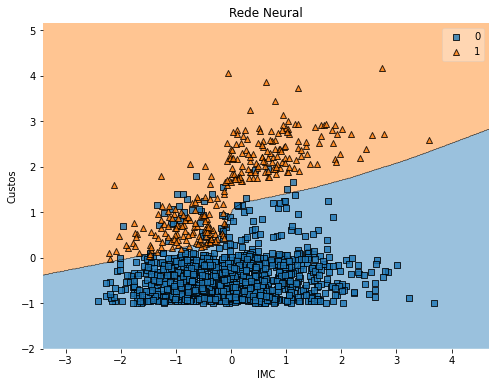

In [23]:
from mlxtend.plotting import plot_decision_regions

import matplotlib.pyplot as plt

modelo.fit(X, y)
 
plt.figure(figsize = (8, 6))
plot_decision_regions(X.values, y.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Rede Neural')  
plt.show()

In [24]:
modelo.n_iter_

59

In [25]:
modelo.loss_curve_

[0.65200399294934,
 0.28841838604475667,
 0.16343677804341392,
 0.13325385296144812,
 0.12237866927995841,
 0.11721000821103505,
 0.11073030873947066,
 0.10520951471633054,
 0.10159489568872661,
 0.09759090054612081,
 0.09793354027424218,
 0.09318146607652222,
 0.09375077191359552,
 0.08858301315372834,
 0.08710581989023454,
 0.08494327933720047,
 0.0845589389815214,
 0.0869376995882103,
 0.08171070372160028,
 0.08159779648100432,
 0.08345673389105501,
 0.08393451336123622,
 0.08248939813878865,
 0.08118635452842302,
 0.08203669718775153,
 0.07753102016423385,
 0.07959943123364006,
 0.07829653502195187,
 0.07892222990076546,
 0.07733025329413709,
 0.07867730477449893,
 0.08323597602867021,
 0.08198753668991426,
 0.07951126167805565,
 0.07895975913612752,
 0.08698670960037032,
 0.07916020468867933,
 0.0788440674944364,
 0.07813213621681053,
 0.07625753547598152,
 0.0757555961001637,
 0.07747977884029046,
 0.08036388262641392,
 0.07953110065119774,
 0.0832567376874476,
 0.079236111118889